<a href="https://colab.research.google.com/github/Nanditha-S1209/PRODIGY_DS_02/blob/main/Prodigy_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:

df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
missing=df.isnull().sum()

In [ ]:
df.duplicated().sum()

0

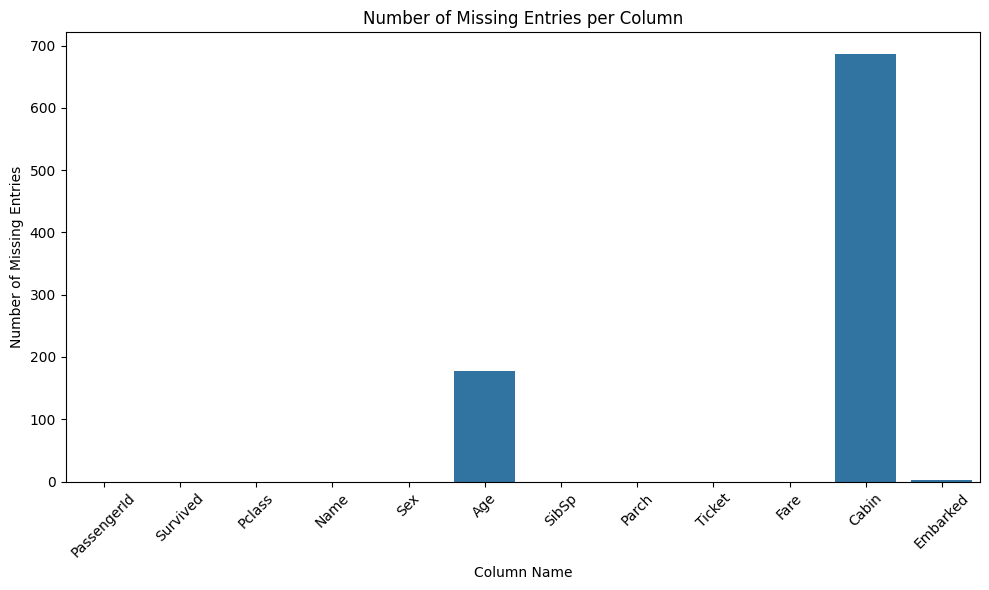

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Entries')
plt.title('Number of Missing Entries per Column')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Number of Missing Values')

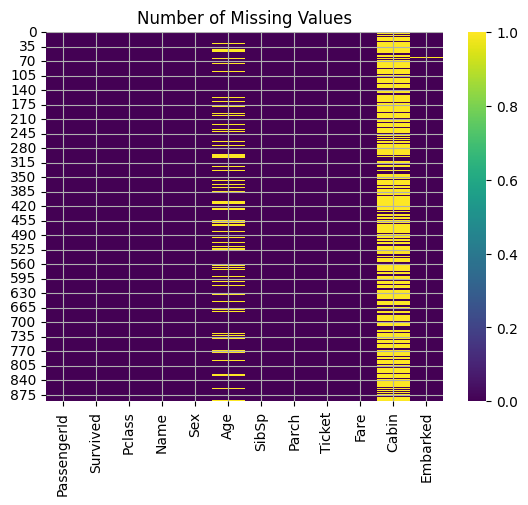

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")


In [ ]:
print(df.shape)



(891, 12)


In [ ]:
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
df=df.drop(['Name'],axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
for col in df.columns:
  df[col]=df[col].fillna(df[col].mode()[0])

Text(0.5, 1.0, 'Number of Missing Values')

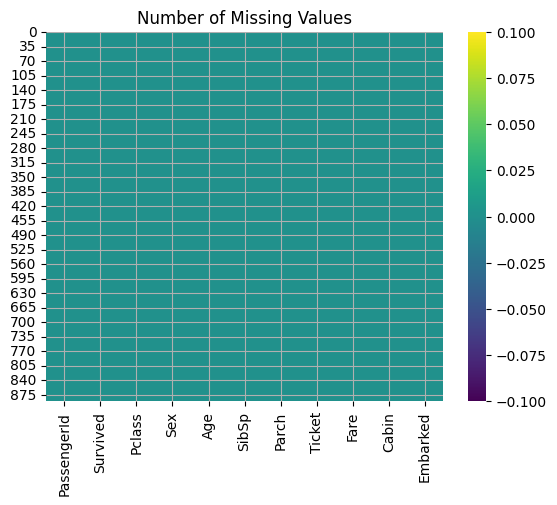

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")


In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ['Sex', 'Embarked','Cabin']
label_encoder = LabelEncoder()

for col in columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))



In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,47,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,47,2
3,4,1,1,0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,1,35.0,0,0,373450,8.0500,47,2


In [ ]:

df['Fare']=df['Fare'].round().astype(int)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7,47,2
1,2,1,1,0,38.0,1,0,PC 17599,71,81,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,8,47,2
3,4,1,1,0,35.0,1,0,113803,53,55,2
4,5,0,3,1,35.0,0,0,373450,8,47,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    int64  
 9   Cabin        891 non-null    int64  
 10  Embarked     891 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 76.7+ KB


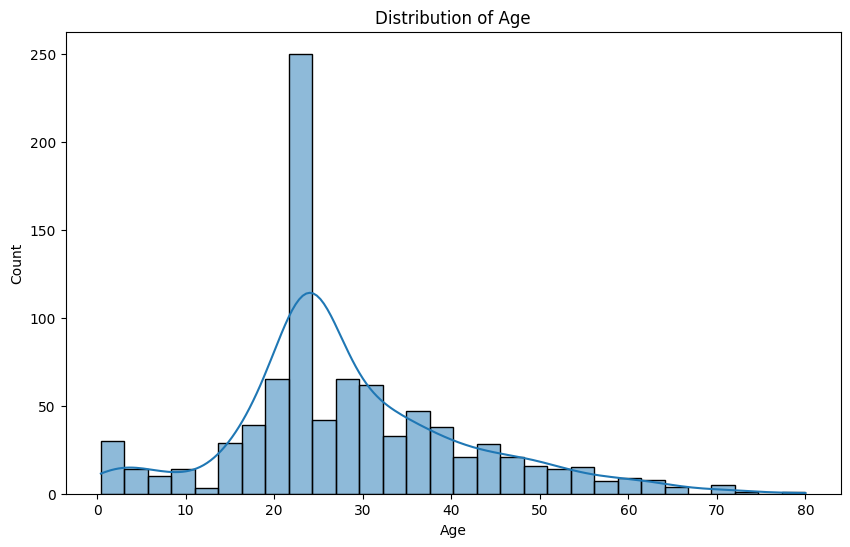

In [ ]:
# Univariate analysis - Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()



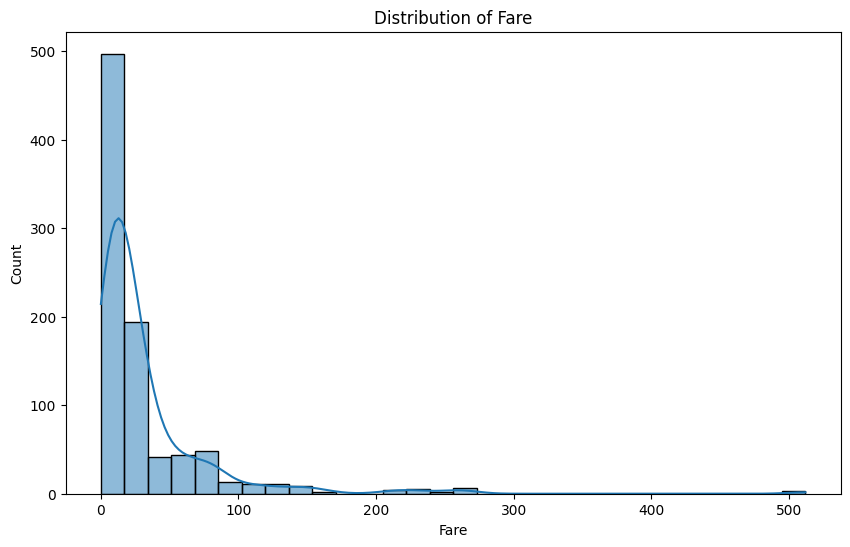

In [ ]:

# Univariate analysis - Distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()


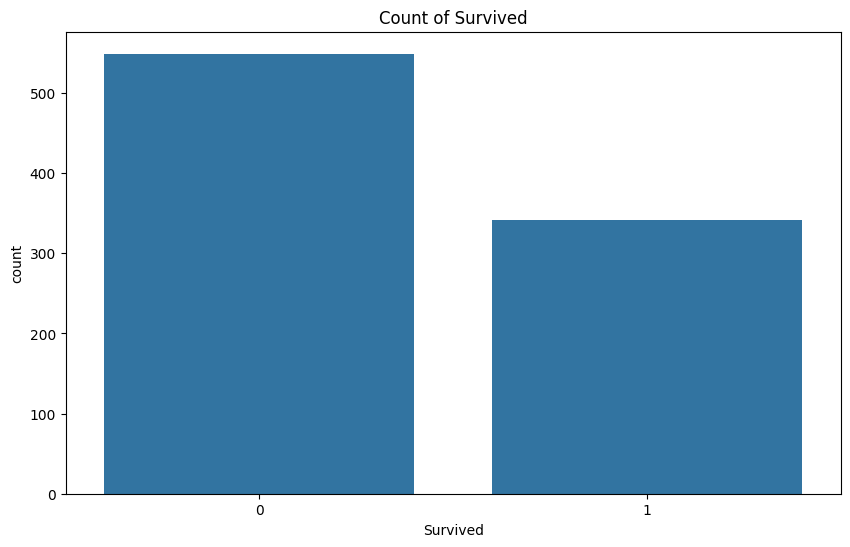

In [ ]:

# Univariate analysis - Countplot of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived')
plt.show()

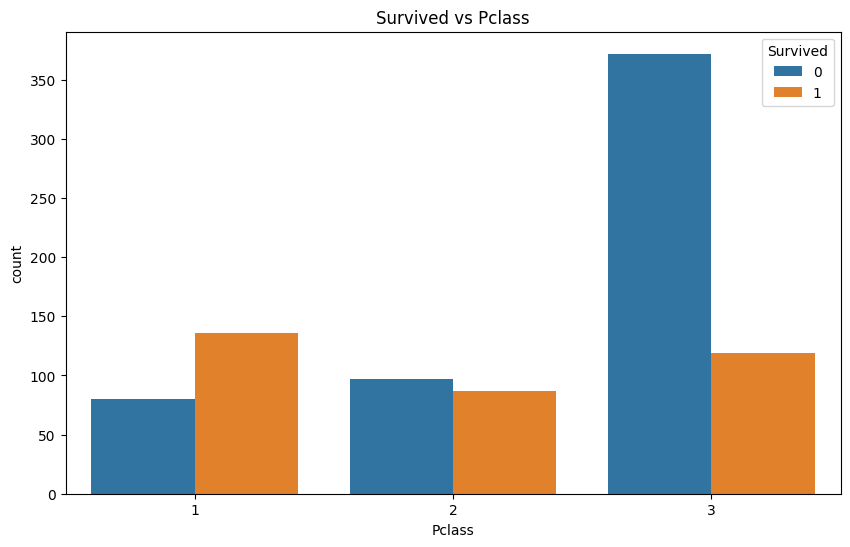

In [ ]:
# Bivariate analysis - Survived vs Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survived vs Pclass')
plt.show()




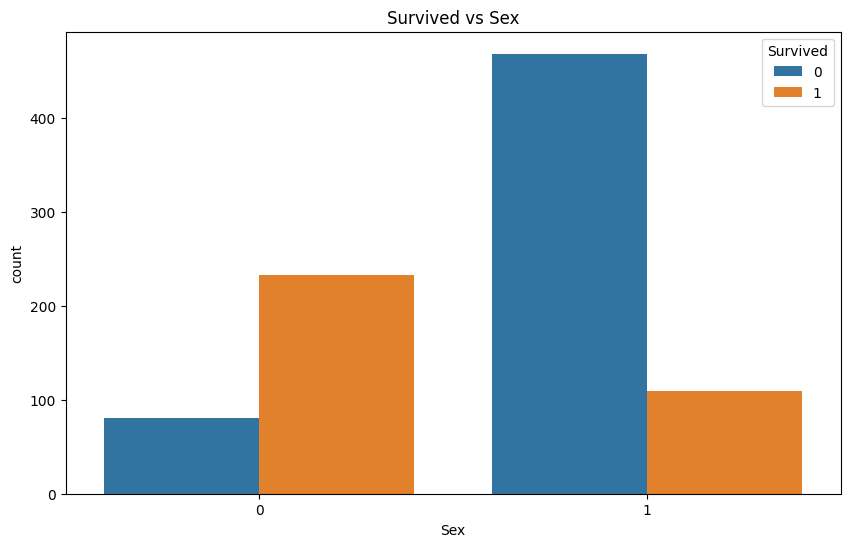

In [ ]:
# Bivariate analysis - Survived vs Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survived vs Sex')
plt.show()



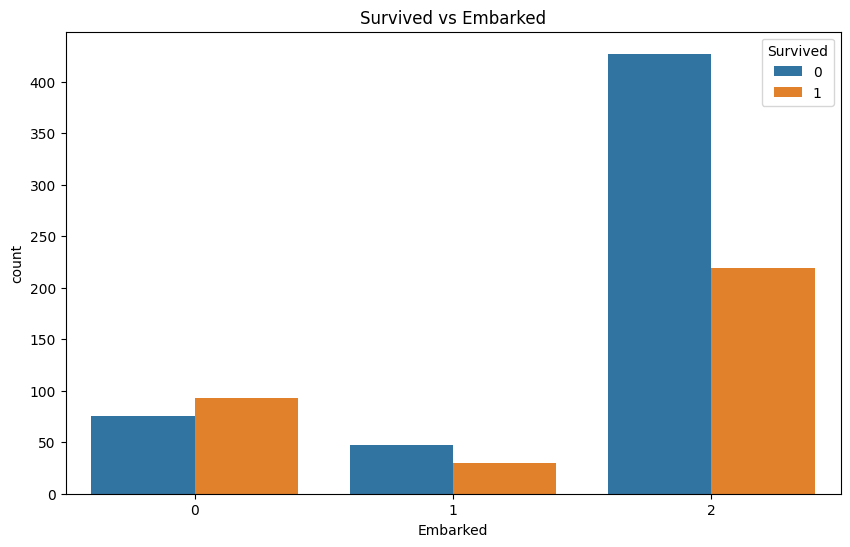

In [ ]:
# Bivariate analysis - Survived vs Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survived vs Embarked')
plt.show()

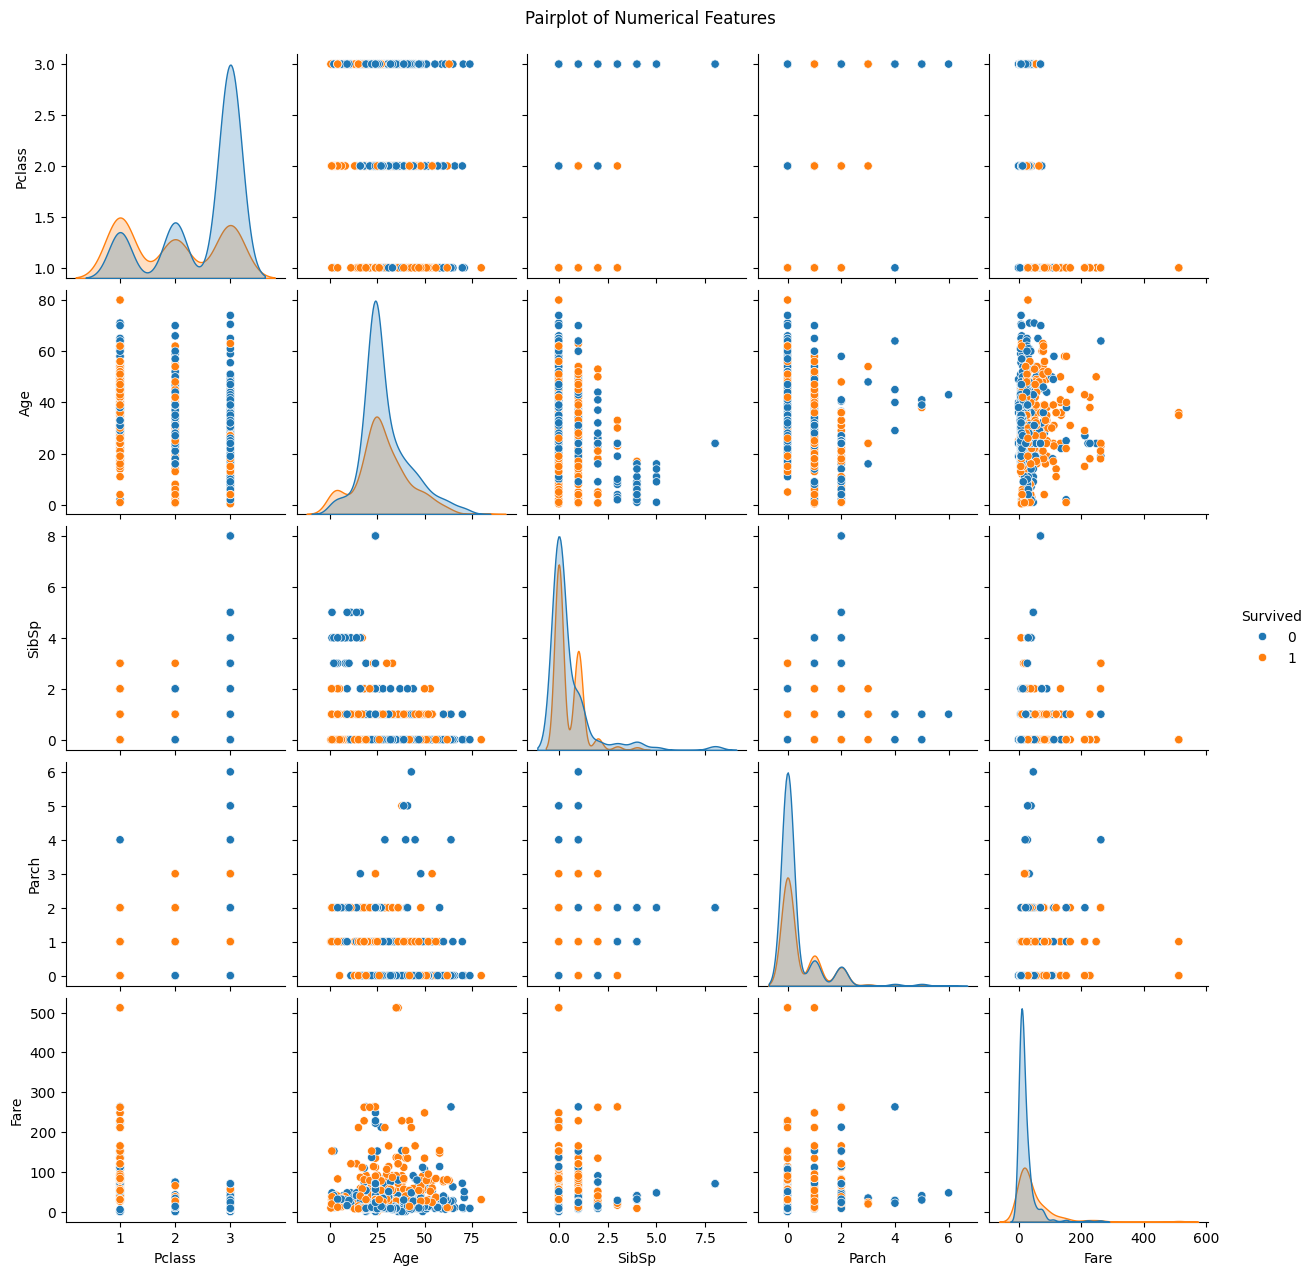

In [ ]:
# Multivariate analysis - Pairplot of numerical features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()



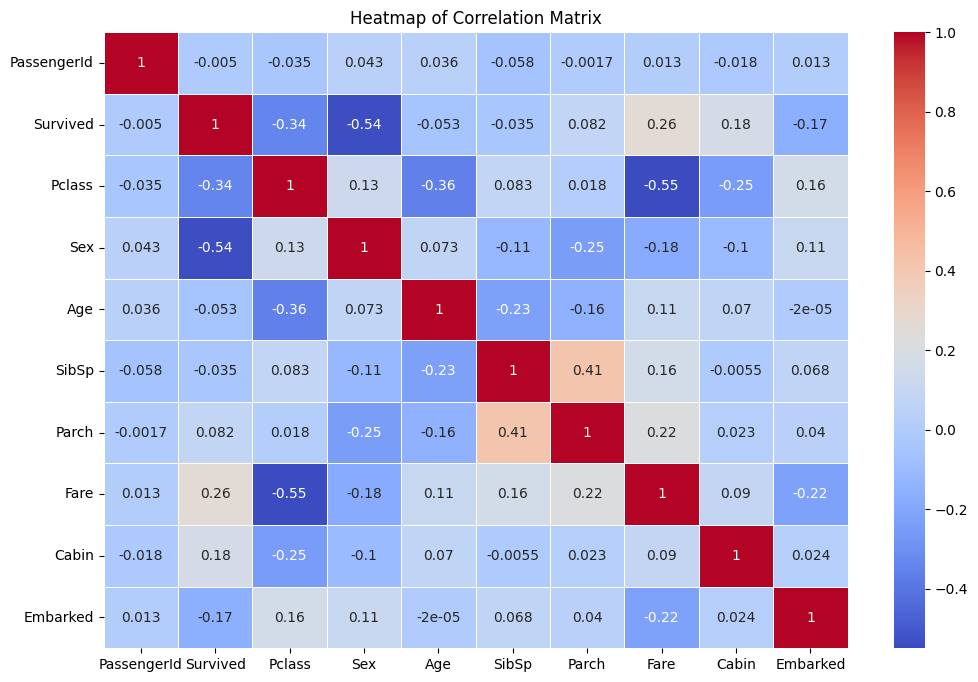

In [ ]:
df=df.drop(['Ticket'],axis=1)
# Multivariate analysis - Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()